In [ ]:
#pip install qiskit

In [ ]:
#pip install pylatexenc

In [ ]:
#pip install qiskit-aer

In [4]:
from qiskit import *
from qiskit_aer import Aer
%matplotlib inline
from qiskit.visualization import plot_histogram

In [5]:
# Set the secret number that we want to discover.
secret_number = '11001010001'

secret_number_length = len(secret_number)
secret_number_reversed = reversed(secret_number)
secret_number_range = range(secret_number_length)

In [6]:
# Create the quantum circuit.
# secret_number_length + 1 = The number of qubits (quantum bits) in the circuit.
# secret_number_length = The number of classical bits for measurement.

circuit = QuantumCircuit(secret_number_length + 1, secret_number_length)

In [7]:
circuit.h(secret_number_range) # Apply Hadamard gate. Creates superposition over the qubits.
circuit.x(secret_number_length) # Apply Pauli-X gate and flip the last qubit.
circuit.h(secret_number_length) # Apply Hadamard gate to the flipped qubit.

circuit.barrier() # Display a visual barrier.

for index, value in enumerate(secret_number_reversed):
    print(f"index{index} is {value}")
    if value == "1":
        circuit.cx(index, secret_number_length) # Apply CNOT gate.

circuit.barrier()
circuit.h(secret_number_range)
circuit.barrier()

circuit.measure(secret_number_range, secret_number_range) # Measure each qubit in and save the result in the corresponding classical bit, at the same index.

index0 is 1
index1 is 0
index2 is 0
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 0
index9 is 1
index10 is 1


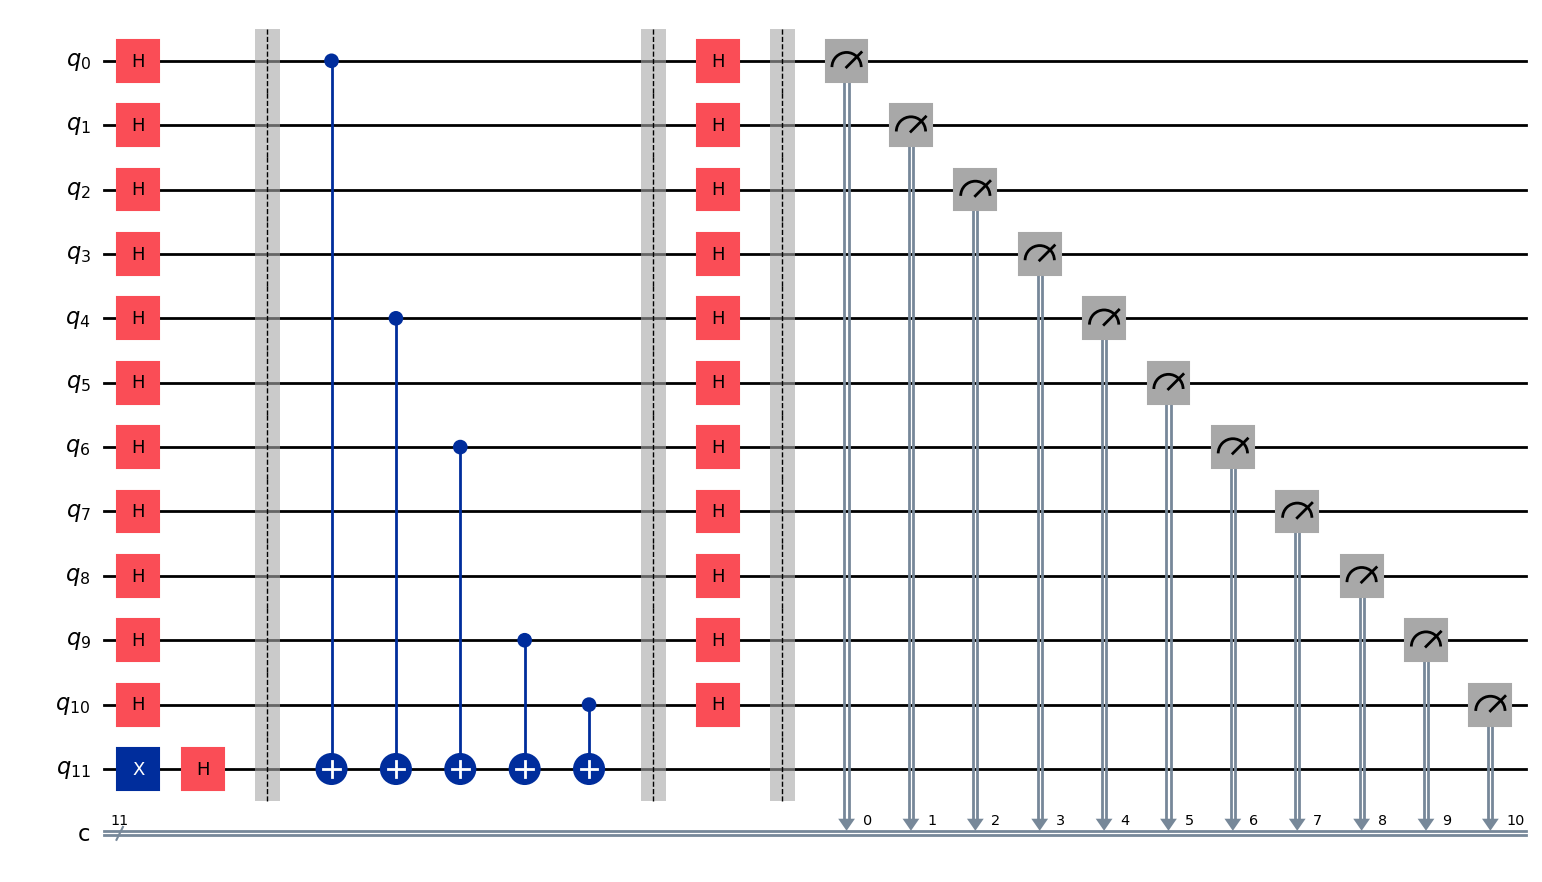

In [8]:
circuit.draw(output='mpl')

In [9]:
# Simulate a quantum circuit using Qiskit's Aer backend and display the measured results.
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots = 1).result() # shots=1 The circuit is executed only once.
counts = result.get_counts()
print(counts)

key_value = next(iter(counts))

if key_value == secret_number:
  print("\nThe secret number is: ", key_value)
else:
  print("\nThe secret number was not found.")

{'11001010001': 1}

The secret number is:  11001010001


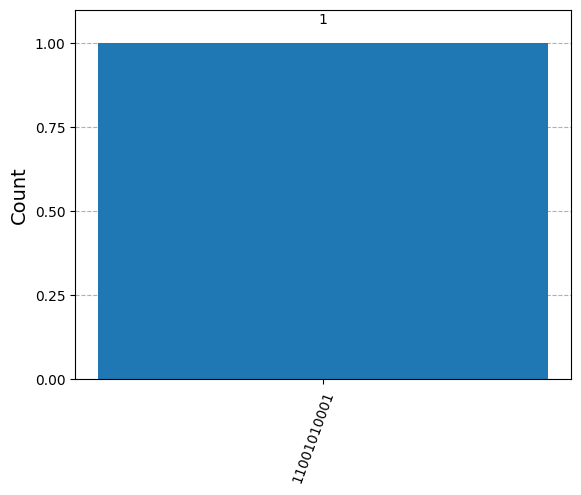

In [10]:
plot_histogram([counts])